In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import itertools as it
from collections import defaultdict
import seaborn as sns

In [3]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [4]:
# read data to pd frame
train_trs = pd.read_csv('/home/user/Desktop/courseProject/data/train_transaction.csv')

In [12]:
pd.set_option('display.max_columns', None)
train_trs.head()
train_trs.describe()

TransactionID        isFraud  TransactionDT  TransactionAmt  \
count   5.905400e+05  590540.000000   5.905400e+05   590540.000000   
mean    3.282270e+06       0.034990   7.372311e+06      135.027176   
std     1.704744e+05       0.183755   4.617224e+06      239.162522   
min     2.987000e+06       0.000000   8.640000e+04        0.251000   
25%     3.134635e+06       0.000000   3.027058e+06       43.321000   
50%     3.282270e+06       0.000000   7.306528e+06       68.769000   
75%     3.429904e+06       0.000000   1.124662e+07      125.000000   
max     3.577539e+06       1.000000   1.581113e+07    31937.391000   

               card1          card2          card3          card5  \
count  590540.000000  581607.000000  588975.000000  586281.000000   
mean     9898.734658     362.555488     153.194925     199.278897   
std      4901.170153     157.793246      11.336444      41.244453   
min      1000.000000     100.000000     100.000000     100.000000   
25%      6019.000000     214.000000     150.000000     166.000000   
50%      9678.000000     361.000000     150.000000     226.000000   
75%     14184.000000     512.000000     150.000000     226.000000   
max     18396.000000     600.000000     231.000000     237.000000   

               addr1          addr2          dist1         dist2  \
count  524834.000000  524834.000000  238269.000000  37627.000000   
mean      290.733794      86.800630     118.502180    231.855423   
std       101.741072       2.690623     371.872026    529.053494   
min       100.000000      10.000000       0.000000      0.000000   
25%       204.000000      87.000000       3.000000      7.000000   
50%       299.000000      87.000000       8.000000     37.000000   
75%       330.000000      87.000000      24.000000    206.000000   
max       540.000000     102.000000   10286.000000  11623.000000   

                  C1             C2             C3             C4  \
count  590540.000000  590540.000000  590540.000000  590540.000000   
mean       14.092458      15.269734       0.005644       4.092185   
std       133.569018     154.668899       0.150536      68.848459   
min         0.000000       0.000000       0.000000       0.000000   
25%         1.000000       1.000000       0.000000       0.000000   
50%         1.000000       1.000000       0.000000       0.000000   
75%         3.000000       3.000000       0.000000       0.000000   
max      4685.000000    5691.000000      26.000000    2253.000000   

                  C5             C6             C7             C8  \
count  590540.000000  590540.000000  590540.000000  590540.000000   
mean        5.571526       9.071082       2.848478       5.144574   
std        25.786976      71.508467      61.727304      95.378574   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       1.000000       0.000000       0.000000   
50%         0.000000       1.000000       0.000000       0.000000   
75%         1.000000       2.000000       0.000000       0.000000   
max       349.000000    2253.000000    2255.000000    3331.000000   

                  C9            C10            C11            C12  \
count  590540.000000  590540.000000  590540.000000  590540.000000   
mean        4.480240       5.240343      10.241521       4.076227   
std        16.674897      95.581443      94.336292      86.666218   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       1.000000       0.000000   
50%         1.000000       0.000000       1.000000       0.000000   
75%         2.000000       0.000000       2.000000       0.000000   
max       210.000000    3257.000000    3188.000000    3188.000000   

                 C13            C14             D1             D2  \
count  590540.000000  590540.000000  589271.000000  309743.000000   
mean       32.539918       8.295215      94.347568     169.563231   
std       129.364844      49.544262     157.660387     177.315865   

In [13]:
len(train_trs.columns)

394

In [6]:

train_trs_num_descr = train_trs.describe()
# из describe удаляем TransactionID, isFraud, а также категориальные колонки
train_trs_num_descr = train_trs_num_descr.drop(columns=['TransactionID', 'isFraud', 'card1', 'card2', 'card3', 'card5', 'addr1', 'addr2'])
print(train_trs_num_descr)
pd.reset_option('display.max_columns')

       TransactionDT  TransactionAmt          dist1         dist2  \
count   5.905400e+05   590540.000000  238269.000000  37627.000000   
mean    7.372311e+06      135.027176     118.502180    231.855423   
std     4.617224e+06      239.162522     371.872026    529.053494   
min     8.640000e+04        0.251000       0.000000      0.000000   
25%     3.027058e+06       43.321000       3.000000      7.000000   
50%     7.306528e+06       68.769000       8.000000     37.000000   
75%     1.124662e+07      125.000000      24.000000    206.000000   
max     1.581113e+07    31937.391000   10286.000000  11623.000000   

                  C1             C2             C3             C4  \
count  590540.000000  590540.000000  590540.000000  590540.000000   
mean       14.092458      15.269734       0.005644       4.092185   
std       133.569018     154.668899       0.150536      68.848459   
min         0.000000       0.000000       0.000000       0.000000   
25%         1.000000       1.0000

In [40]:
# рассчитываем count, unique, top, freq для категориальных колонок с числовыми значениями
# добавляем в describe категориальные колонки, у которых числовые значения
def add_categorical_int_inplace(df, df_describe, name):
    counts = df.groupby(name)[name].count()
    top_elem = counts.idxmax()
    top_elem_freq = counts[top_elem]
    s = df[name]
    df_describe.loc[:, name] = [s.count(), len(counts), top_elem, top_elem_freq]


In [41]:
train_trs_categor_descr = train_trs.describe(include='object')
print(train_trs_categor_descr)
print("----")
for name in ['card1', 'card2', 'card3', 'card5', 'addr1', 'addr2']:
    add_categorical_int_inplace(train_trs, train_trs_categor_descr, name)

print(train_trs_categor_descr)

       ProductCD   card4   card6 P_emaildomain R_emaildomain      M1      M2  \
count     590540  588963  588969        496084        137291  319440  319440   
unique         5       4       4            59            60       2       2   
top            W    visa   debit     gmail.com     gmail.com       T       T   
freq      439670  384767  439938        228355         57147  319415  285468   

            M3      M4      M5      M6      M7      M8      M9  
count   319440  309096  240058  421180  244275  244288  244288  
unique       2       3       2       2       2       2       2  
top          T      M0       F       F       F       F       T  
freq    251731  196405  132491  227856  211374  155251  205656  
----
       ProductCD   card4   card6 P_emaildomain R_emaildomain      M1      M2  \
count     590540  588963  588969        496084        137291  319440  319440   
unique         5       4       4            59            60       2       2   
top            W    visa   de

In [42]:
train_idn = pd.read_csv('/home/user/Desktop/courseProject/data/train_identity.csv')

In [43]:
# describe для числовых признаков для таблицы train_identity
train_idn_num_descr = train_idn.loc[:,'id_01':'id_11'].describe()
print(train_idn_num_descr)

               id_01          id_02         id_03         id_04  \
count  144233.000000  140872.000000  66324.000000  66324.000000   
mean      -10.170502  174716.584708      0.060189     -0.058938   
std        14.347949  159651.816856      0.598231      0.701015   
min      -100.000000       1.000000    -13.000000    -28.000000   
25%       -10.000000   67992.000000      0.000000      0.000000   
50%        -5.000000  125800.500000      0.000000      0.000000   
75%        -5.000000  228749.000000      0.000000      0.000000   
max         0.000000  999595.000000     10.000000      0.000000   

               id_05          id_06        id_07        id_08         id_09  \
count  136865.000000  136865.000000  5155.000000  5155.000000  74926.000000   
mean        1.615585      -6.698710    13.285354   -38.600388      0.091023   
std         5.249856      16.491104    11.384207    26.084899      0.983842   
min       -72.000000    -100.000000   -46.000000  -100.000000    -36.000000   
2

In [44]:
pd.set_option('display.max_columns', None)
# describe для категориальных признаков для таблицы train_identity
train_idn_categor_descr = train_idn.loc[:,'id_12':].describe(include='object')
for name in ['id_13', 'id_14', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22', 'id_24', 'id_25', 'id_26', 'id_32']:
    add_categorical_int_inplace(train_idn, train_idn_categor_descr, name)
    
print(train_idn_categor_descr)

pd.reset_option('display.max_columns')

           id_12   id_15   id_16                 id_23  id_27   id_28   id_29  \
count     144233  140985  129340                  5169   5169  140978  140978   
unique         2       3       2                     3      2       2       2   
top     NotFound   Found   Found  IP_PROXY:TRANSPARENT  Found   Found   Found   
freq      123025   67728   66324                  3489   5155   76232   74926   

             id_30        id_31      id_33           id_34   id_35   id_36  \
count        77565       140282      73289           77805  140985  140985   
unique          75          130        260               4       2       2   
top     Windows 10  chrome 63.0  1920x1080  match_status:2       T       F   
freq         21155        22000      16874           60011   77814  134066   

         id_37   id_38 DeviceType DeviceInfo     id_13    id_14     id_17  \
count   140985  140985     140810     118666  127320.0  80044.0  139369.0   
unique       2       2          2       1786     

In [168]:
%%time 
num_filler = -999

def replace_nan_in_columns(df, col_names, filler):
    length = len(df)
    for name in col_names:
        for i in range(length):
            if np.isnan(df.loc[i,name]):
                df.loc[i,name] = filler

                
def replace_nan_in_row(df, col_names, filler, row_num):
    for name in col_names:
        if np.isnan(df.loc[row_num,name]):
            df.loc[row_num,name] = filler            
    
from multiprocessing import Pool

#top_100_trs = train_trs[:1000]


def replace_nan_in_columns_parallel(df, col_names, filler, count_cores):
    rows = len(df)
    args = [(df, col_names, filler, i) for i in range(rows)]
    #print(args)
    with Pool(count_cores) as p:
        p.starmap(replace_nan_in_row, args)


#replace_nan_in_columns_parallel(train_trs, train_trs.loc[:,['TransactionDT', 'TransactionAmt', 'dist1', 'dist2']].columns, num_filler, 6)
       
#replace_nan_in_columns_parallel(train_trs, train_trs.loc[:,['TransactionDT', 'TransactionAmt', 'dist1', 'dist2']].columns, num_filler,6)
#replace_nan_in_columns_parallel(train_trs, train_trs.loc[:,'D1':'D15'].columns, num_filler,6)
#replace_nan_in_columns_parallel(train_trs, train_trs.loc[:,'V1':].columns, num_filler,6)

#replace_nan_in_columns_parallel(train_idn, train_idn.loc[:,'id_01':'id_11'].columns, num_filler,6)

CPU times: user 6 µs, sys: 3 µs, total: 9 µs
Wall time: 10.3 µs


In [ ]:
cl = list(train_trs.loc[:,['TransactionDT', 'TransactionAmt', 'dist1', 'dist2']].columns) + list(train_trs.loc[:,'V1':].columns) + list(train_trs.loc[:,'D1':'D15'].columns) 
replace_nan_in_columns_parallel(train_trs, cl, num_filler,6)

In [32]:
%%time
train_trs.to_csv('train_transaction_with_filler.csv')

CPU times: user 1min 39s, sys: 0 ns, total: 1min 39s
Wall time: 1min 39s


In [80]:
filled = pd.read_csv('/train_transaction_with_filler.csv')

In [179]:
'D1' in filled.columns

True

CPU times: user 35.6 ms, sys: 0 ns, total: 35.6 ms
Wall time: 34.1 ms


Text(0, 0.5, 'Count')

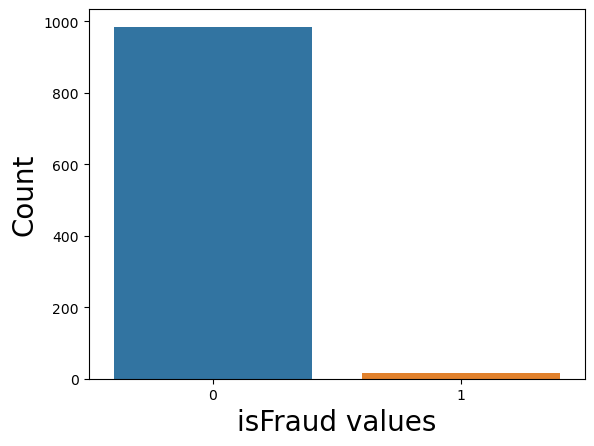

In [142]:
%%time
top_filled = filled[:1000]

def get_imper_distrib(df, aim_col):
    source_dict = {0:0, 1:0}
    for i in range(len(df)):
        if df.loc[i, aim_col] == 0: source_dict[0] +=1
        if df.loc[i, aim_col] == 1: source_dict[1] +=1
    return source_dict


d = get_imper_distrib(top_filled, 'isFraud')
keys = list(d.keys())
vals = [float(d[k]) for k in keys]
p = sns.barplot(x=keys, y=vals, )
p.set_xlabel("isFraud values", fontsize = 20)
p.set_ylabel("Count", fontsize = 20)

In [161]:
#d = top_filled.corr(top_filled['isFraud'])
#d.head(1000)

def correlate_list(df, aimCol):
    cor_list = []
    for col in df.columns:
        #print(col)
        
        #if col!=aimCol and str(df[col][1]).isdigit():
        print(df[col][2])
            #cor_list.append(df[col].corr(df[aimCol]))
    return cor_list

d = correlate_list(top_filled, "isFraud")

2
2987002
0
86469
59.0
W
4663
490.0
150.0
visa
166.0
debit
330.0
87.0
287.0
nan
outlook.com
nan
1.0
1.0
0.0
0.0
0.0
1.0
0.0
0.0
1.0
0.0
1.0
0.0
1.0
1.0
0.0
nan
nan
0.0
nan
nan
nan
nan
nan
0.0
315.0
nan
nan
nan
315.0
T
T
T
M0
F
F
F
F
F
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
0.0
1.0
1.0
1.0
0.0
0.0
0.0
0.0
1.0
1.0
0.0
0.0
1.0
1.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
1.0
1.0
0.0
0.0
1.0
0.0
0.0
1.0
1.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
1.0
1.0
0.0
0.0
0.0
0.0
1.0
1.0
0.0
0.0
1.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
1.0
1.0
0.0
0.0
0.0
1.0
1.0
0.0
0.0
1.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
n

In [155]:
print(d)

[0.019364957869195207, 0.019364957869195207, 0.013781723885161594, 0.004972007533666146]


In [174]:
list(train_trs.loc[:,'D1':'D15'].columns)

['D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'D6',
 'D7',
 'D8',
 'D9',
 'D10',
 'D11',
 'D12',
 'D13',
 'D14',
 'D15']

In [7]:
train_trs.dtypes!="object".columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       ...
       'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338',
       'V339'],
      dtype='object', length=339)

In [175]:
list(train_trs.loc[:,['TransactionDT', 'TransactionAmt', 'dist1', 'dist2']].columns) + list(train_trs.loc[:,'V1':].columns) + list(train_trs.loc[:,'D1':'D15'].columns) + list(train_idn.loc[:,'id_01':'id_11'].columns)

['V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'V29',
 'V30',
 'V31',
 'V32',
 'V33',
 'V34',
 'V35',
 'V36',
 'V37',
 'V38',
 'V39',
 'V40',
 'V41',
 'V42',
 'V43',
 'V44',
 'V45',
 'V46',
 'V47',
 'V48',
 'V49',
 'V50',
 'V51',
 'V52',
 'V53',
 'V54',
 'V55',
 'V56',
 'V57',
 'V58',
 'V59',
 'V60',
 'V61',
 'V62',
 'V63',
 'V64',
 'V65',
 'V66',
 'V67',
 'V68',
 'V69',
 'V70',
 'V71',
 'V72',
 'V73',
 'V74',
 'V75',
 'V76',
 'V77',
 'V78',
 'V79',
 'V80',
 'V81',
 'V82',
 'V83',
 'V84',
 'V85',
 'V86',
 'V87',
 'V88',
 'V89',
 'V90',
 'V91',
 'V92',
 'V93',
 'V94',
 'V95',
 'V96',
 'V97',
 'V98',
 'V99',
 'V100',
 'V101',
 'V102',
 'V103',
 'V104',
 'V105',
 'V106',
 'V107',
 'V108',
 'V109',
 'V110',
 'V111',
 'V112',
 'V113',
 'V114',
 'V115',
 'V116',
 'V117',
 'V118',
 'V119',
 'V120',
 'V121',
 'V122',
 'V123',
 

In [8]:
len(train_trs)

590540

In [10]:
train_trs.loc[:, 'V129'].head(100)

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
     ... 
95    0.0
96    0.0
97    0.0
98    0.0
99    0.0
Name: V129, Length: 100, dtype: float64